## 4. Autistic Spectrum Disorder Screening Data for Children Data Set

In [51]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

from logger import Logger
from helpers import count_unique_values, replace_values
from plotly.subplots import make_subplots

In [52]:
# Create logger instance
logger = Logger(__name__)

In [53]:
df_asd = pd.read_csv('../data/uci/autistic_spectrum/asd_screening.csv')

In [54]:
# Step 1.1 - Display the dataset information:
df_asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        249 non-null    object 
 13  jaundice         292 non-null    object 
 14  autism           292 non-null    object 
 15  country_of_res   292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [55]:
# Step 1.2 - Display the first rows of the dataframe:
display(df_asd.head())

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [56]:
# Step 1.3 - Dataset Dimensions
print("Dataset Dimensions:")
print(f"- Rows: {df_asd.shape[0]}")
print(f"- Columns: {df_asd.shape[1]}")

Dataset Dimensions:
- Rows: 292
- Columns: 21


In [57]:
# Step 1.4 - Column Names & Types
print("Column Names and Data Types:")
print(df_asd.dtypes)

Column Names and Data Types:
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
autism              object
country_of_res      object
used_app_before     object
result               int64
age_desc            object
relation            object
class               object
dtype: object


In [58]:
# Step 1.5 - Missing Values
print("Missing Values Per Column:")
print(df_asd.isnull().sum())

Missing Values Per Column:
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jaundice            0
autism              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           43
class               0
dtype: int64


In [59]:
# Step 1.6 - Summary Statistics (Numerical Columns)
print("Summary Statistics:")
print(df_asd.describe())

Summary Statistics:
         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.633562    0.534247    0.743151    0.551370    0.743151    0.712329   
std      0.482658    0.499682    0.437646    0.498208    0.437646    0.453454   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      result  
count  292.000000  292.000000  292.000000  292.000000  288.000000  292.000000  
mean     0.606164    0.496575    0.493151    0.726027    6.354167    6.239726  
std      0

In [60]:
# Step 1.7 - Target Variable Distribution: RiskLevel
print("Target Variable: Class (Autism yes/no)")
print(df_asd["class"].value_counts())

Target Variable: Class (Autism yes/no)
class
NO     151
YES    141
Name: count, dtype: int64


Lets investigate the missing values in the children autism dataset.

As the target variable is a binary value it makes sense to convert it into a numerical values for NO -> 0 and Yes -> 1 for easier computation and handling.

In [61]:
df_asd['class'] = pd.Series(np.where(df_asd['class'].values == 'YES', 1, 0),
          df_asd.index)

As the column age_desc is just a range description of the actual dependant variable age it can be dropped.

In [62]:
df_asd = df_asd.drop('age_desc', axis=1)

The autism column is not described anywhere and too dependant on the actual class value and is therefore dropped as well.

In [63]:
df_asd = df_asd.drop('autism', axis=1)

Lets investigate the missing values in the dataset for proper handling. 

In [64]:
from helpers import summarize_missing

summarize_missing(df_asd)

,missing_count,missing_pct
A1_Score,0,0.000000
A2_Score,0,0.000000
A3_Score,0,0.000000
A4_Score,0,0.000000
A5_Score,0,0.000000
A6_Score,0,0.000000
A7_Score,0,0.000000
A8_Score,0,0.000000
A9_Score,0,0.000000
A10_Score,0,0.000000


The column with the least missing records is the age feature. With a missing value count of 4, it does not really make sense in terms of effort to interpolate these values but to just drop the four records with the missing age value. 

In [65]:
df_asd['age'].unique()

array([ 6.,  5.,  4., 11., 10.,  8.,  7.,  9., nan])

In [66]:
df_asd = df_asd.dropna(subset=['age'])
df_asd['age'].unique()

array([ 6.,  5.,  4., 11., 10.,  8.,  7.,  9.])

Now lets turn to the two features (ethnicity, relation) with almost 14 percent of the datapoints missing. Lets look at the distinct values these features have.

In [67]:
df_asd['ethnicity'].unique()

array(['Others', "'Middle Eastern '", nan, 'White-European', 'Black',
       "'South Asian'", 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino'], dtype=object)

In [68]:
df_asd['relation'].unique()

array(['Parent', nan, 'Self', 'Relative', "'Health care professional'",
       'self'], dtype=object)

Firstly, there are duplicates in the unique values. For the relation of the test taker there is a capitalized self value and a non-capitalized self value. These can be merged as the meaning of these values are the same. As the missing data percentage is quite significant, the rows with missing values do not get dropped but replaced with the most frequent value.

In [69]:
# replace self with Self to merge duplicate values
df_asd['relation'] = df_asd['relation'].apply(lambda x: 'Self' if str(x).lower() == 'self' else x)
df_asd['relation'].unique()

array(['Parent', nan, 'Self', 'Relative', "'Health care professional'"],
      dtype=object)

In [70]:
# Pleace nan with most frequent values
from helpers import impute_mode, summarize_missing

df_asd = impute_mode(df_asd, ['relation', 'ethnicity'])

# validating unique values
display(df_asd['relation'].unique())
display(df_asd['ethnicity'].unique())

# validate overall missing values
summarize_missing(df_asd)

array(['Parent', 'Self', 'Relative', "'Health care professional'"],
      dtype=object)

array(['Others', "'Middle Eastern '", 'White-European', 'Black',
       "'South Asian'", 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino'], dtype=object)

,missing_count,missing_pct
A1_Score,0,0.0
A2_Score,0,0.0
A3_Score,0,0.0
A4_Score,0,0.0
A5_Score,0,0.0
A6_Score,0,0.0
A7_Score,0,0.0
A8_Score,0,0.0
A9_Score,0,0.0
A10_Score,0,0.0


In [71]:
# Step 1.8 - Distribution of Class Values / Autism occurance
# a) Bar chart
fig_class = px.histogram(
    df_asd, 
    x="class", 
    color="class",
    title="Distribution of Autism Occurance",
    text_auto=True
)
fig_class.show()

In [72]:
# Numeric summary
class_counts = df_asd["class"].value_counts().sort_index()
class_props = df_asd["class"].value_counts(normalize=True).sort_index()

balance_df = pd.DataFrame({
    "count": class_counts,
    "proportion": class_props
})
print("\nClass balance summary:\n", balance_df)


Class balance summary:
        count  proportion
class                   
0        149    0.517361
1        139    0.482639


In [73]:

# Numerische Spalten auswählen
numeric_cols = df_asd.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create correlation matrix
corr_matrix = df_asd[numeric_cols].corr()

# Create the heatmap
fig_corr = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale="RdBu",
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlation")
))

# Adjust layout to make it larger
fig_corr.update_layout(
    title="Correlation Matrix of Numeric Variables",
    width=600,  # Increase width
    height=500,  # Increase height
    title_x=0.5,  # Center title
    xaxis=dict(
        tickangle=45,  # Rotate X-axis ticks for better readability
    ),
    yaxis=dict(
        tickangle=0  # Keep Y-axis ticks horizontal for better readability
    ),
    showlegend=False  # Hide legend
)

# Show the heatmap
fig_corr.show()

In [74]:
plots_per_row = 3
num_plots = len(numeric_cols)
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

# Subplot erstellen
fig = make_subplots(
    rows=num_rows, cols=plots_per_row,
    subplot_titles=numeric_cols
)

# Für jede numerische Spalte ein Histogramm hinzufügen
for i, col in enumerate(numeric_cols):
    row = i // plots_per_row + 1
    col_pos = i % plots_per_row + 1

    fig.add_trace(
        go.Histogram(
            x=df_asd[col],
            nbinsx=30,
            name=col
        ),
        row=row,
        col=col_pos
    )

# Layout anpassen
fig.update_layout(
    height=300 * num_rows,
    width=1000,
    title_text="Histogramme der numerischen Features",
    showlegend=False
)

fig.show()


We can not that while the class distribution is pretty balanced, the balance in the score are quite of. To keep the good balance in the class target variable, we will keeep this balance and note it. When the model performs poorly, we might have to revisit this imbalance and see if this could improve performanceö

In [75]:
plots_per_row = 3
num_plots = len(numeric_cols)
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

fig = make_subplots(rows=num_rows, cols=plots_per_row, subplot_titles=numeric_cols)

for i, col in enumerate(numeric_cols):
    row = i // plots_per_row + 1
    col_pos = i % plots_per_row + 1

    fig.add_trace(
        go.Box(
            y=df_asd[col],
            name=col,
            boxpoints=False
        ),
        row=row,
        col=col_pos
    )

fig.update_layout(
    height=300 * num_rows,
    width=1000,
    title_text="Boxplots of numeric features",
    showlegend=False
)

fig.show()

In [76]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

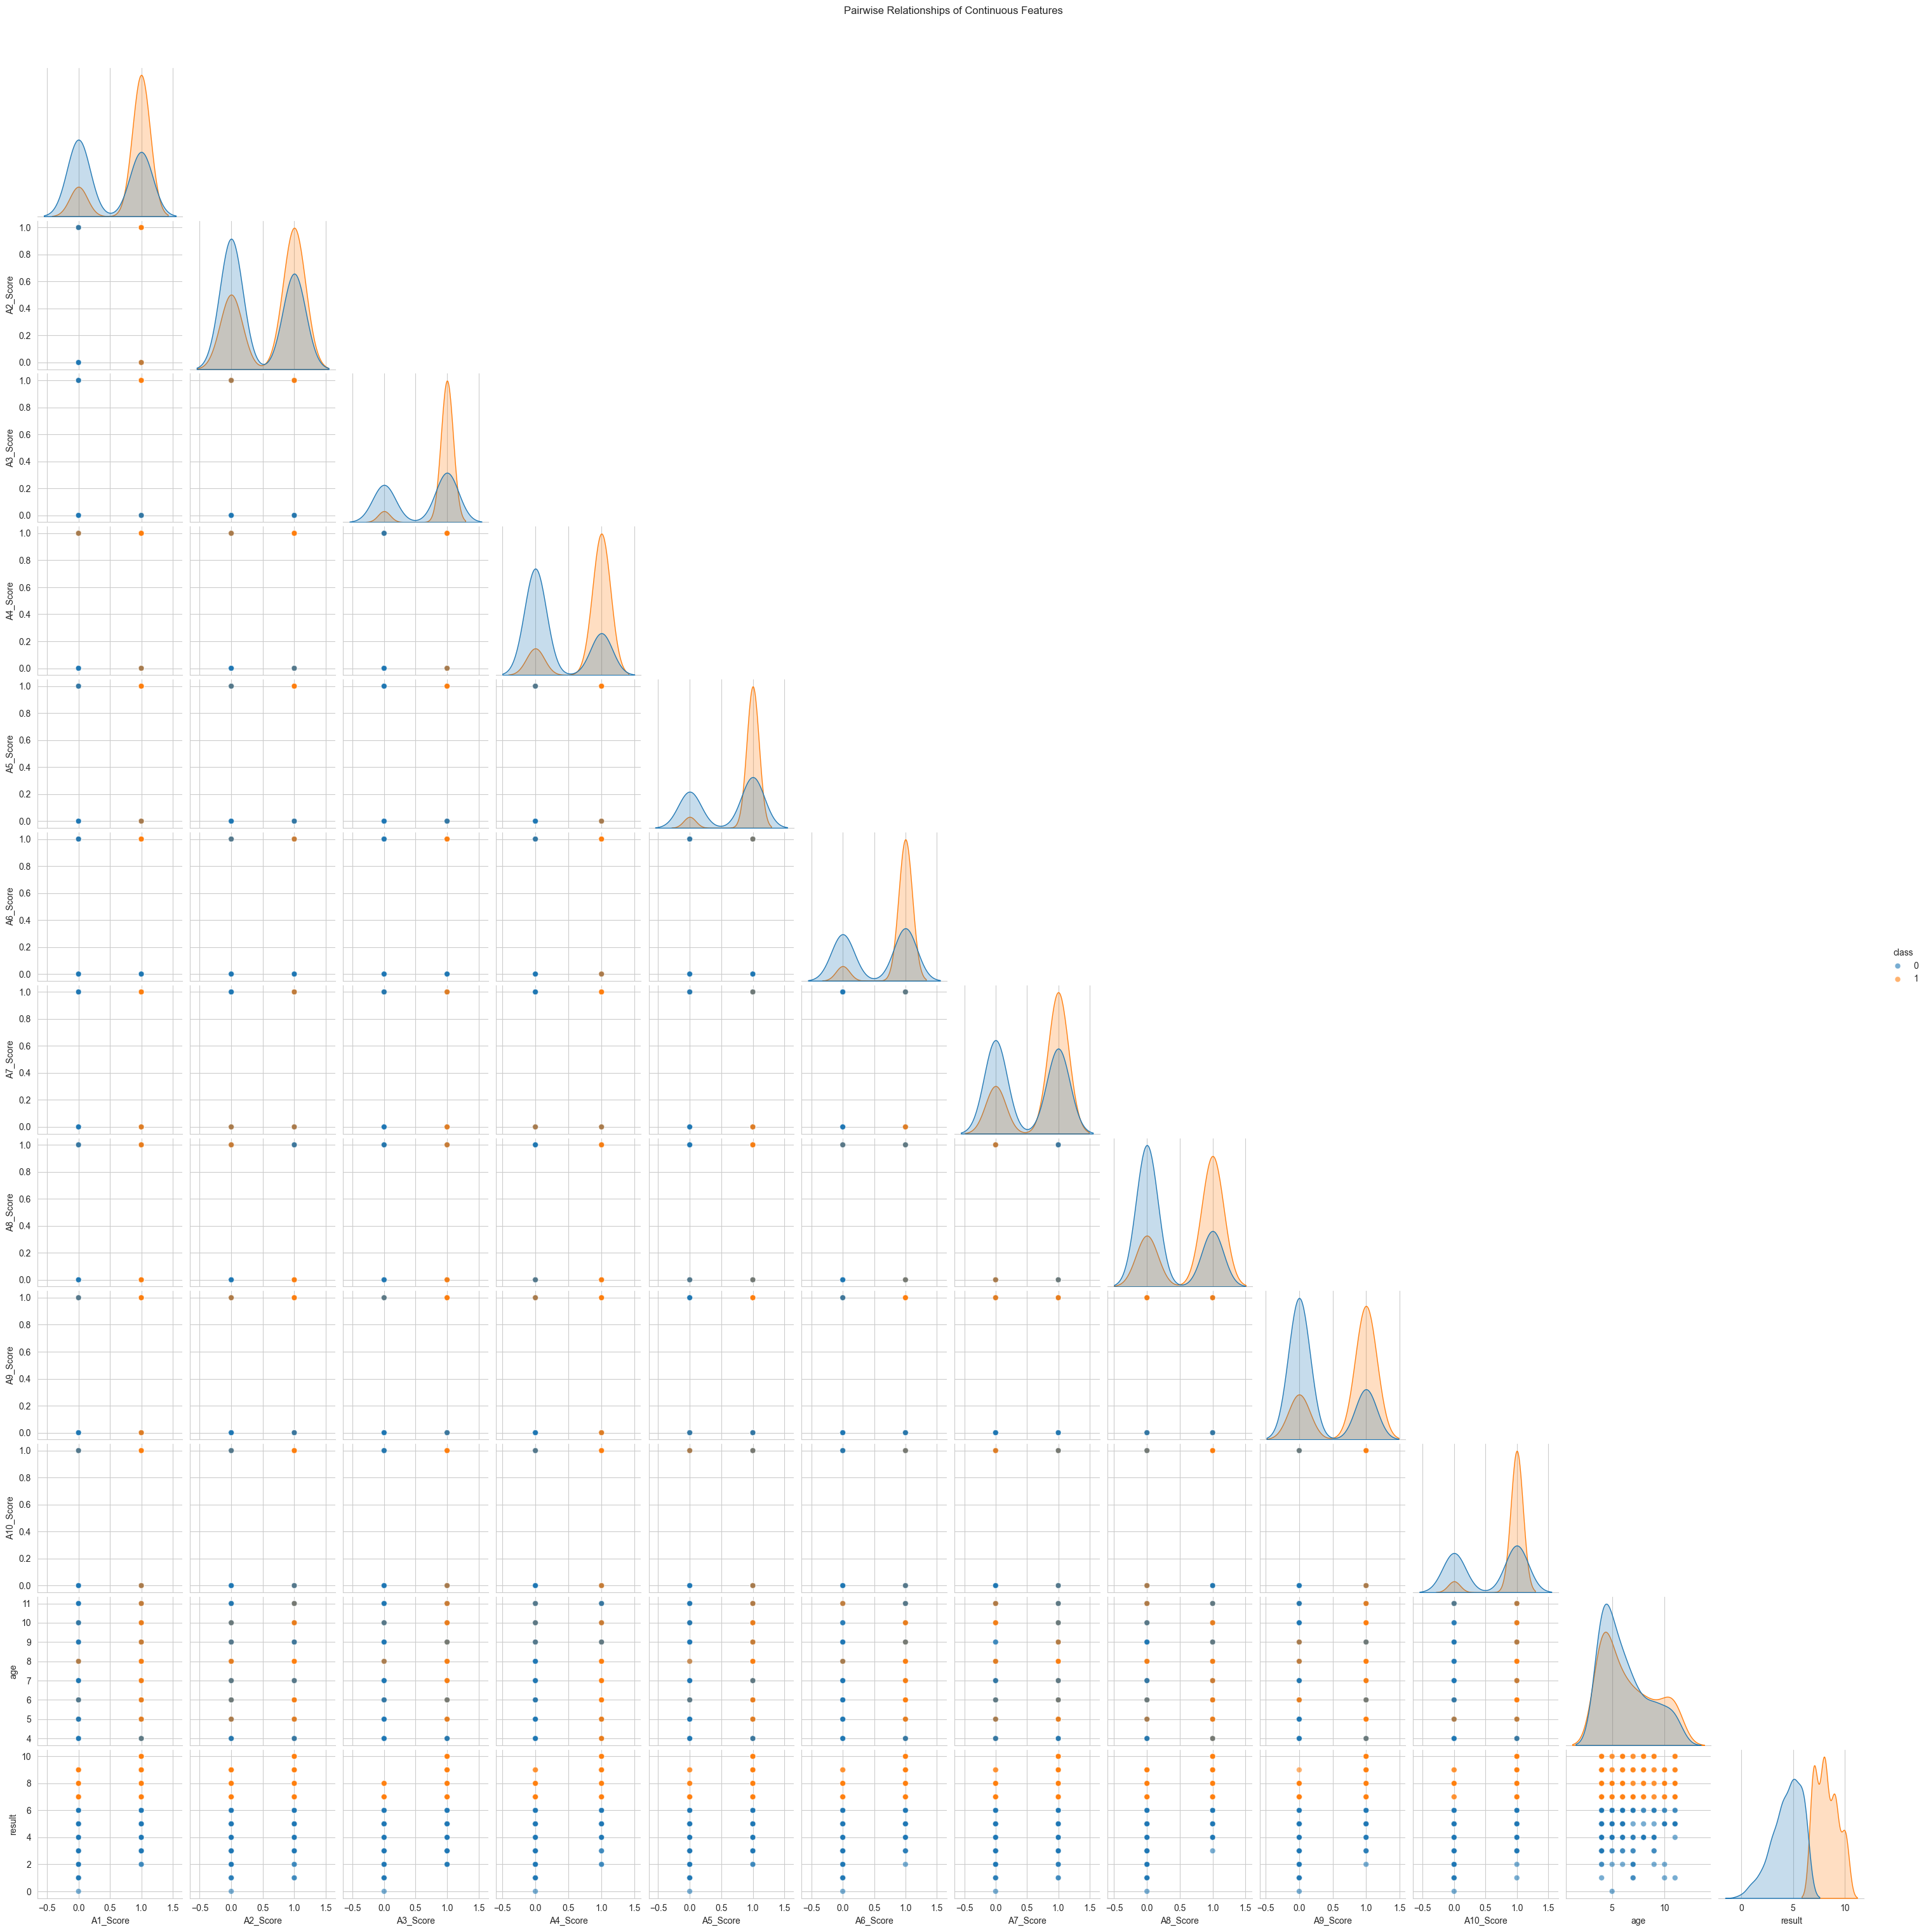

In [77]:
# 1. Pairwise relationships (pairplot with KDE on diagonals)
sns.set_style("whitegrid")
pairplot_sample = df_asd.sample(min(len(df_asd), 500), random_state=42)
plot = sns.pairplot(
    pairplot_sample,
    hue="class",             # color by class
    diag_kind="kde",             # show KDE on the diagonal
    corner=True,                 # only lower triangle
    plot_kws={"alpha": 0.6, "s": 40},
    diag_kws={"fill": True}      # change 'shade' to 'fill'
)
plot.figure.suptitle("Pairwise Relationships of Continuous Features", y=1.02)
plt.show()
